# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Choose and motivate for an appropriate likelihood function for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use a conjugate prior distribution for your likelihood function.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

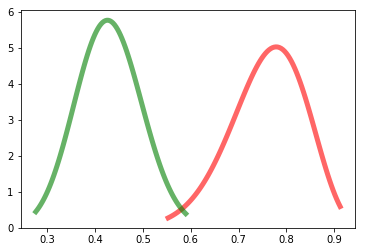

In [41]:
#Computed them on desmos in case I dont get this going fast enough
#All Visualizations https://www.desmos.com/calculator/dyh1l93ll5
#1
"""
A - We have multiple trials, and the probability is not the same across all of them hence why I will not use a plain binomial.
Given that we have a starting average, we can use the mean of Improved and not improved to establish a Beta likelihood 
and go from here.
B- Unobserved parameters of my model are those we have not been defined in the data. These for me are the proportion that did
were affected negatively or those that were not affected by the treatment. 

"""
#2
"""
A-Example are alpha and beta our our dist. 
These include alpha and beta which I infered as alpha = 7589, 2417. By the formula alpha/(alpha+beta) = mean(0.7589).
B-Visualization: https://www.desmos.com/calculator/gqaa2rpi2x
"""
#3
"""
Posterior: Beta(alpha + mean_success, beta + population-mean_success)
Posterior: Beta(23.2084 + 0.7589, 7.3732+30.5817-0.7589)
Posterior: Beta(23.9673, 37.196)
"""
beta = stats.beta
fig, ax = plt.subplots(1, 1)
#These were more refined than the desmos stats
a, b = 21.4280473588, 6.80761920965
#n = Average sample size = 141/6
n=141
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
#Evaluate posterior alpha and beta
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
#Evaluate posterior
mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
x2 = np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
#Plot prior-Red
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
#Plot posterior- Green
ax.plot(x2, beta.pdf(x2, a2, b2), 'g-', lw=5, alpha=0.6, label='beta pdf')


## Task 2: Questions, predictions, and decisions
1. Posterior predictive distribution: Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

New probability of improvement(Mean): 0.08118129258566996


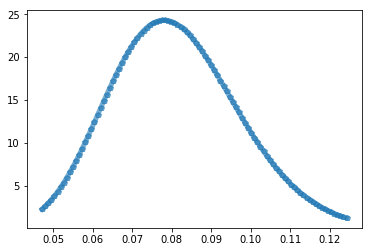

In [42]:
#I know this is shit,I only get the formulas right but my numbers are shambles.
#I deserve the 1 and 2. Im honestly struggling to figure this out and will come to class to gain clarity.
#Reading on my own does not cut it especially with the sheer of volume of technical content. Maybe Im just too dumb for this
#Forgive me for not getting the right answers.
#Our n would be increased by 100.
#We would thus have a beta: Beta(23.9673, 137.196)
#We will increase out n by 100 

n+=100
a3, b3 = (21.4280473588+mean), (6.80761920965+n-mean)
mean, var, skew, kurt = beta.stats(a3, b3, moments='mvsk')
x3 = np.linspace(beta.ppf(0.01, a3, b3), beta.ppf(0.99, a3, b3), 100)
print("New probability of improvement(Mean): {}".format(mean))
#Our new PDF when we have evaluated 100 extra patients
plt.plot(x3, beta.pdf(x3, a3, b3), 'p-', lw=5, alpha=0.6, label='beta pdf')
#2
"""
At least 2/3 cured: This is 1- (integral till 0.67)
At least 75% cured: This 1 - (integral till 0.75)
"""
#3
"""
Does the model work?
"""